In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

%matplotlib inline

In [26]:
plt.rcParams['font.family'] = 'Malgu Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [27]:
df = pd.read_csv('data/school_report_ver2.csv', encoding='cp949')
df.head(1)

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,기대연봉,전공만족여부,전공관련취업선호도,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부
0,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,나쁨,나쁨,No,No


In [28]:
df.columns
# 컬럼의 내용을 한꺼번에 볼 수 있다. 

Index(['성별', '전공', '신장', '몸무게', '1학년평균성적', '2학년평균성적', '3학년평균성적', '취미',
       '일평균학습시간', '집중공부시간', '기대연봉', '전공만족여부', '전공관련취업선호도', '일평균소셜미디어사용시간',
       '통학시간', '학업스트레스', '교우관계스트레스', '아르바이트여부', '방과후수업여부'],
      dtype='object')

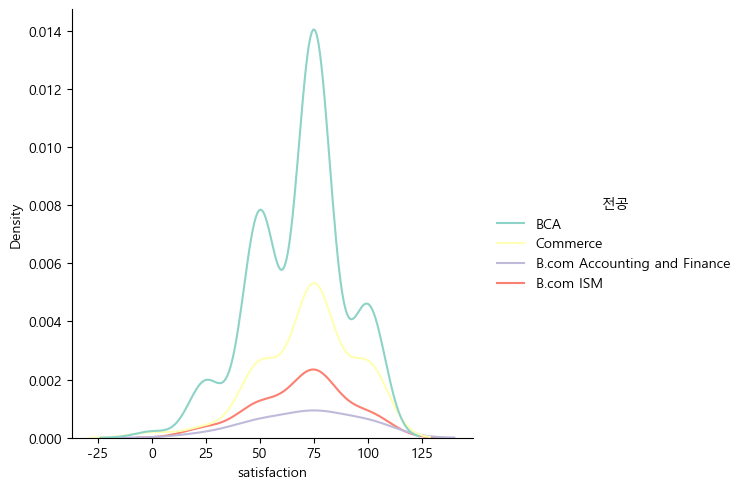

In [47]:
df['satisfaction'] = df['전공관련취업선호도'].str.replace("%","")
df['satisfaction'] = df['satisfaction'].astype('int64')
sns.displot(data=df, kind='kde', x='satisfaction', hue='전공')
plt.rc('font', family='Malgun Gothic')

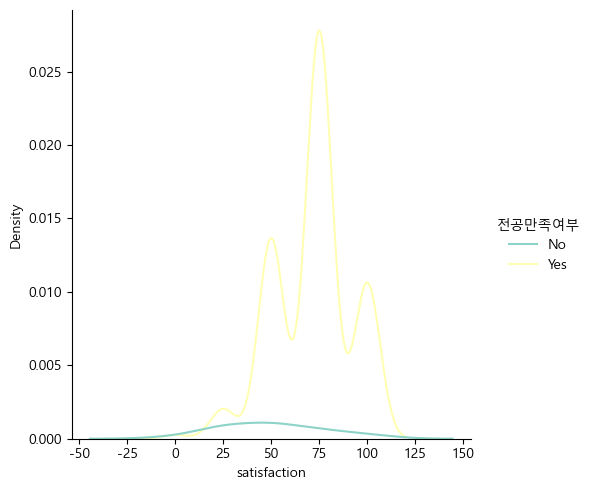

In [30]:
sns.displot(data=df, kind='kde', x='satisfaction', hue='전공만족여부')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Video Games'),
  Text(1, 0, 'Cinema'),
  Text(2, 0, 'Reading books'),
  Text(3, 0, 'Sports')])

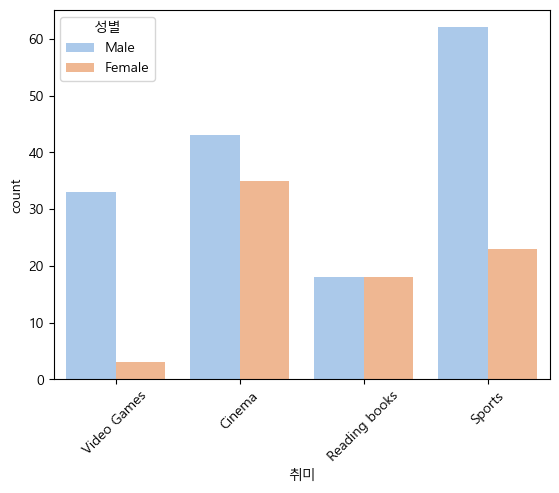

In [31]:
sns.set_palette("pastel")
sns.countplot(data=df, x='취미', hue='성별')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Video Games'),
  Text(1, 0, 'Cinema'),
  Text(2, 0, 'Reading books'),
  Text(3, 0, 'Sports')])

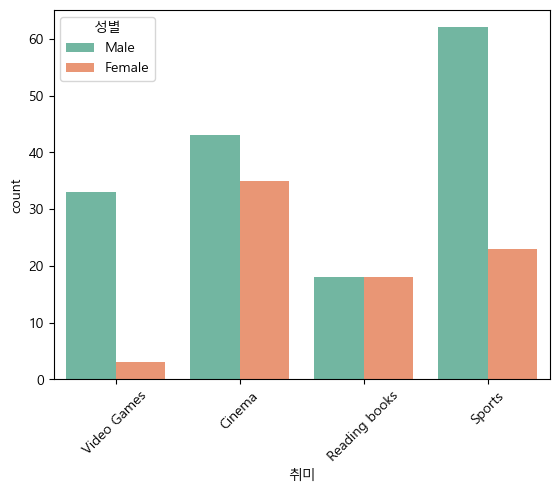

In [32]:
sns.set_palette("Set2")
sns.countplot(data=df, x='취미', hue='성별')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Video Games'),
  Text(1, 0, 'Cinema'),
  Text(2, 0, 'Reading books'),
  Text(3, 0, 'Sports')])

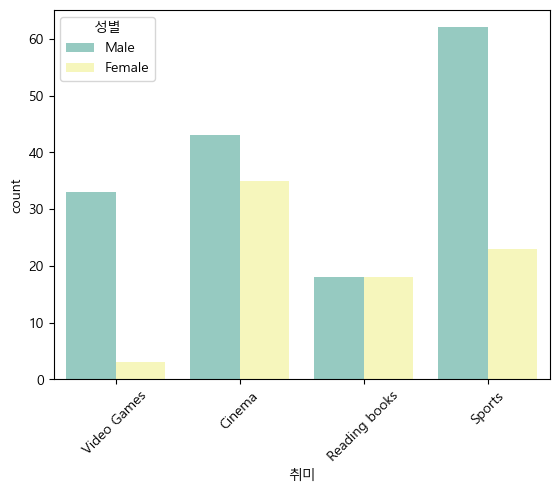

In [33]:
sns.set_palette('Set3')
sns.countplot(data=df, x='취미', hue='성별')
plt.xticks(rotation=45)

<AxesSubplot:ylabel='count'>

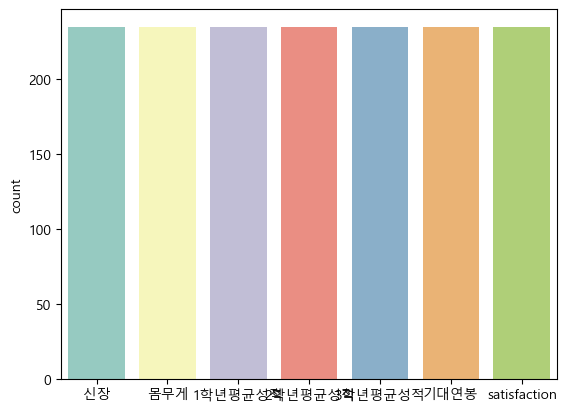

In [34]:
sns.countplot(data=df)

Text(0.5, 1.0, '성별에 따른 신장 몸무게 데이터')

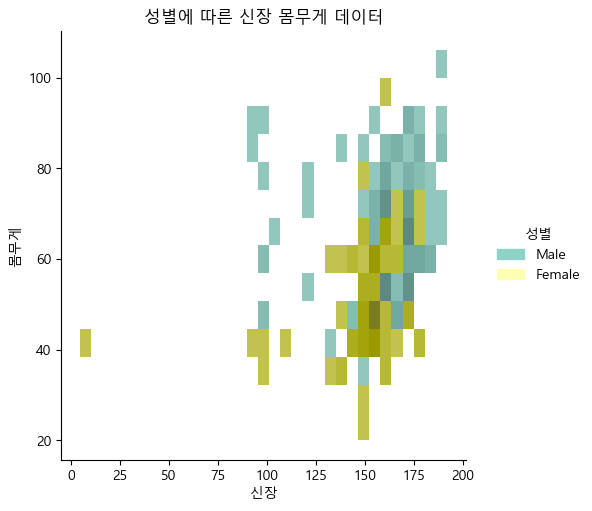

In [35]:
sns.displot(data=df, x='신장', y='몸무게', hue='성별')
plt.title('성별에 따른 신장 몸무게 데이터')

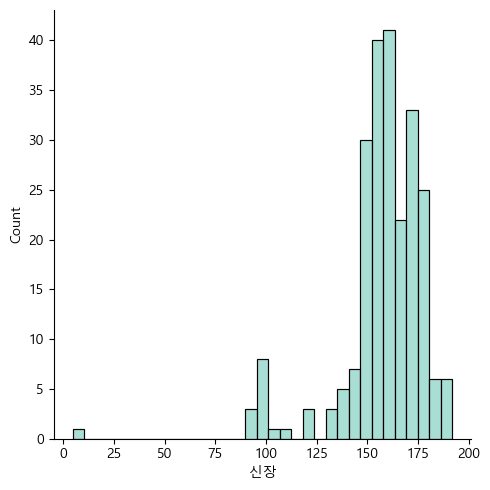

In [36]:
sns.displot(data=df, x='신장')

In [37]:
from scipy.stats import norm

In [38]:
HeightNewDf = pd.DataFrame(df[['신장','성별','몸무게']])
HeightNewDf

,신장,성별,몸무게
0,100.0,Male,58.0
1,90.0,Female,40.0
2,159.0,Male,78.0
3,147.0,Female,20.0
4,170.0,Male,54.0
...,...,...,...
230,170.0,Male,76.0
231,172.0,Male,52.0
232,139.0,Female,33.0
233,153.0,Female,58.0


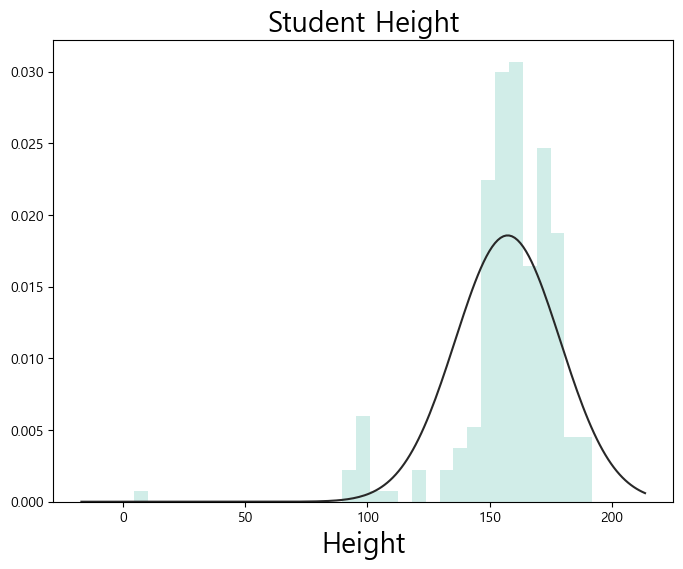

In [46]:
plt.figure(figsize=(8,6))
sns.distplot(HeightNewDf['신장'], fit=norm, kde=False)

plt.title('Student Height', fontsize=20)
plt.xlabel('Height', fontsize=20)
plt.show()

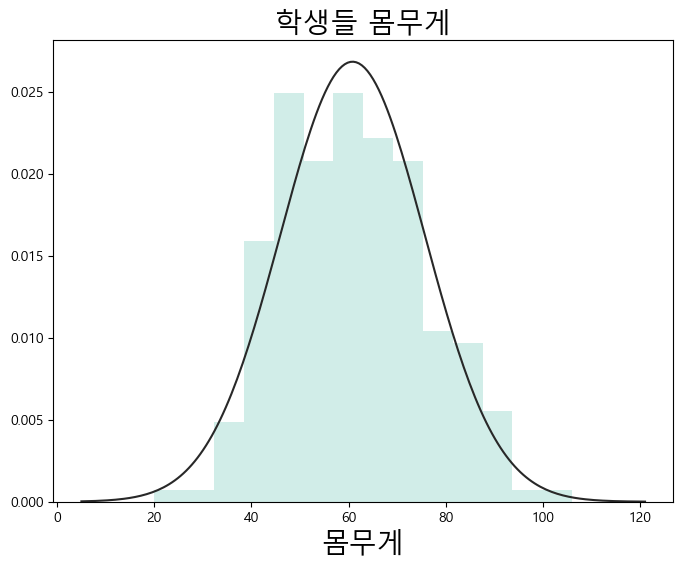

In [40]:
plt.figure(figsize=(8,6))
sns.distplot(df['몸무게'], fit=norm, kde=False)

plt.title('학생들 몸무게', fontsize=20)
plt.xlabel('몸무게', fontsize=20)
plt.show()

In [41]:
maleHeightDf = HeightNewDf[HeightNewDf['성별']=='Male']
femaleHeightDf = HeightNewDf[HeightNewDf['성별']=='Female']

In [42]:
maleHeightDf

,신장,성별,몸무게
0,100.0,Male,58.0
2,159.0,Male,78.0
4,170.0,Male,54.0
6,165.0,Male,50.0
7,152.0,Male,43.0
...,...,...,...
223,170.0,Male,65.0
227,167.0,Male,55.0
228,155.0,Male,68.0
230,170.0,Male,76.0


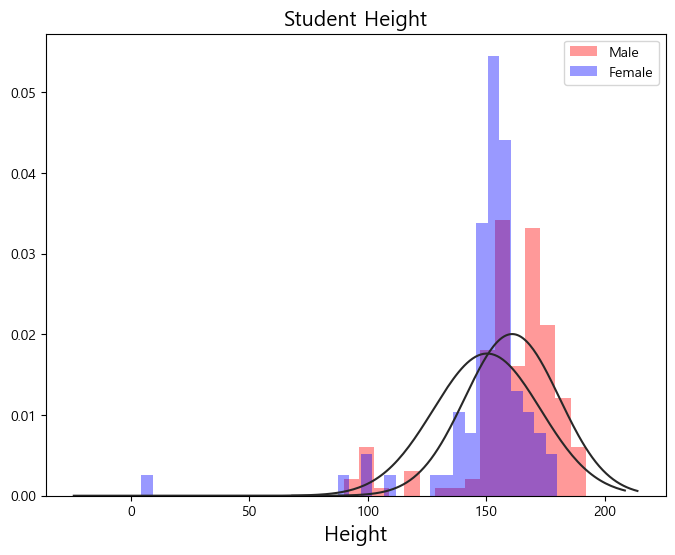

In [45]:
fig = plt.figure(figsize=(8,6))
sns.distplot(maleHeightDf['신장'], fit=norm, color='r', kde=False, label='Male')
sns.distplot(femaleHeightDf['신장'], fit=norm, color='b', kde=False, label='Female')
plt.xlabel('Height', fontsize=15)
plt.title('Student Height', fontsize = 15)
plt.legend()
plt.show()

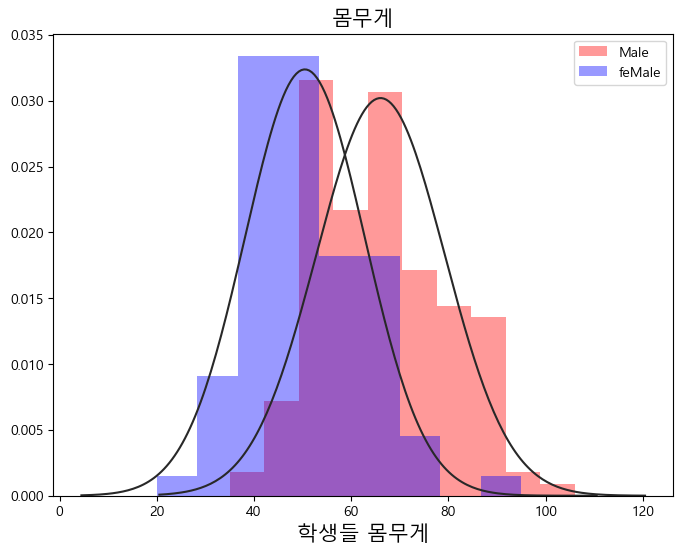

In [44]:
fig = plt.figure(figsize=(8,6))
sns.distplot(maleHeightDf['몸무게'], fit=norm, color='r', kde=False, label='Male')
sns.distplot(femaleHeightDf['몸무게'], fit=norm, color='b', kde=False, label='feMale')
plt.xlabel('학생들 몸무게', fontsize=15)
plt.title('몸무게', fontsize = 15)
plt.legend()
plt.show()